In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

<h2 id="reading_data">Load the data</h2>


In [6]:
df = pd.read_csv(url)

# verify successful load with some randomly selected records
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
887,2014,PORSCHE,BOXSTER,TWO-SEATER,2.7,6,M6,Z,11.5,7.9,9.9,29,228
896,2014,PORSCHE,CAYENNE TURBO,SUV - STANDARD,4.8,8,A8,Z,15.9,10.9,13.7,21,315
925,2014,ROLLS-ROYCE,PHANTOM COUPE,COMPACT,6.7,12,A8,Z,20.7,12.8,17.1,17,393
540,2014,INFINITI,QX50 AWD,STATION WAGON - SMALL,3.7,6,AS7,Z,13.6,9.6,11.8,24,271
283,2014,CHRYSLER,300 (MDS),FULL-SIZE,5.7,8,A5,X,15.8,9.2,12.8,22,294


### Explore and select features


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
# Drop categoricals and any unseless columns
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)

In [9]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [10]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)

In [11]:
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


<Figure size 300x300 with 0 Axes>

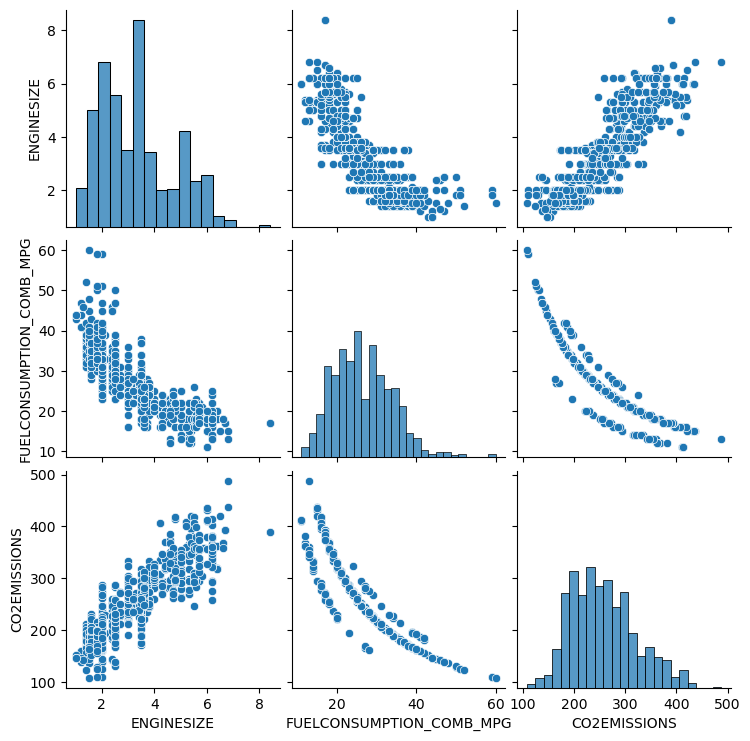

In [16]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize  = (3,3))
sns.pairplot(df)
plt.show()

the relationship between 'FUELCONSUMPTION_COMB_MPG' and 'CO2EMISSIONS' is non-linear.


#### Extract the input features and labels from the data set


In [17]:
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,[2]].to_numpy()

### Preprocess selected features


In [18]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

In practice, if you want to properly evaluate your model, you should definitely not apply such operations to the entire dataset but to the train and test data separately. There's more to it than that. You'll dive deeper into this and other advanced evaluation pitfalls later in the course.


In [20]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

##### Building multiple linear regression model


In [22]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model in the training data
regressor.fit(X_train, y_train)

# Print the coefficients
coef_ =  regressor.coef_
intercept_ = regressor.intercept_

print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)


Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


In [23]:
# Get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

print(means_)
print(std_devs_)

# The least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)


[ 3.34629803 26.44142455]
[1.4152314  7.46520131]
Coefficients:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


##### Plotting scatter plot and regression line for training data using Multiple regression

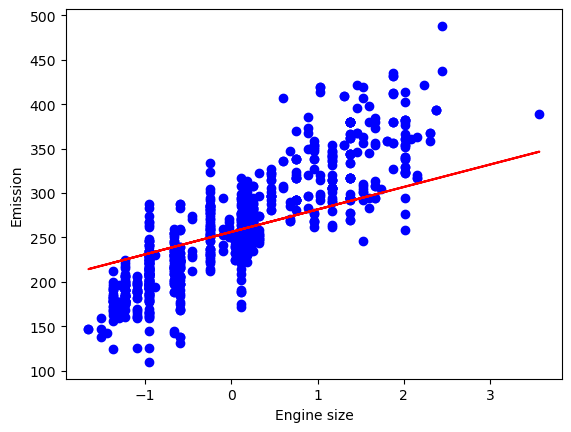

In [27]:
plt.scatter(X_train[:,0], y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

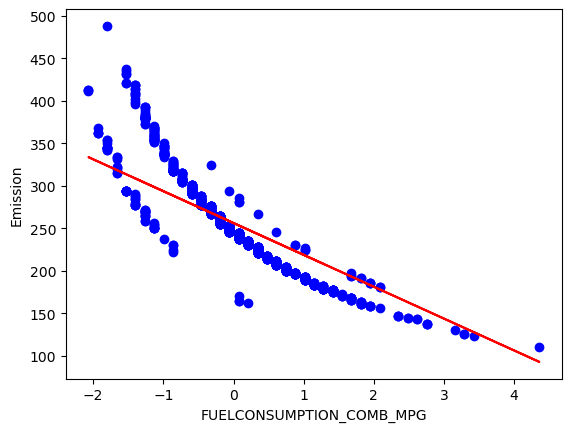

In [35]:

## FUELCONSUMPTION_COMB_MPG vs  Emission MLR
plt.scatter(X_train[:,1], y_train,  color='blue')
plt.plot(X_train[:,1], coef_[0,1] * X_train[:,1] + intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

#### USING A LINEAR REGRESSION

In [36]:
X_train_1 = X_train[:, 0].reshape(-1, 1)

print(y.shape)
print(X_train_1.shape)

(1067, 1)
(853, 1)


In [37]:

regressor_1 = linear_model.LinearRegression()
regressor_1.fit(X_train_1, y_train)
coef_1 =  regressor_1.coef_
intercept_1 = regressor_1.intercept_

print ('Coefficients: ',coef_1)
print ('Intercept: ',intercept_1)

Coefficients:  [[55.18408797]]
Intercept:  [256.77183014]


Text(0, 0.5, 'Emission')

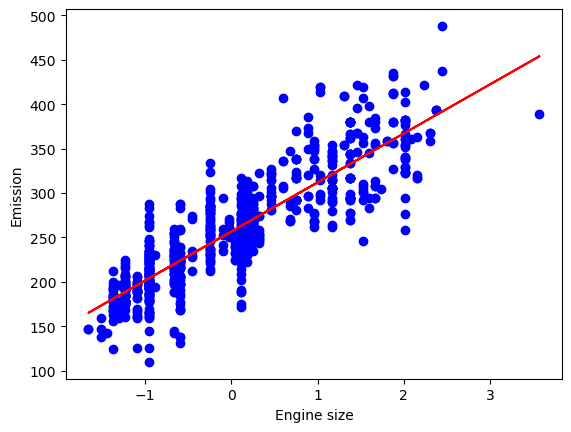

In [38]:

plt.scatter(X_train_1, y_train,  color='blue')
plt.plot(X_train_1, coef_1[0] * X_train_1 + intercept_1, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

###### we can see the simple linear regression model provides a much better fit of CO2 emissions on the training data than the multiple regression model did. 


Text(0, 0.5, 'CO2 Emission')

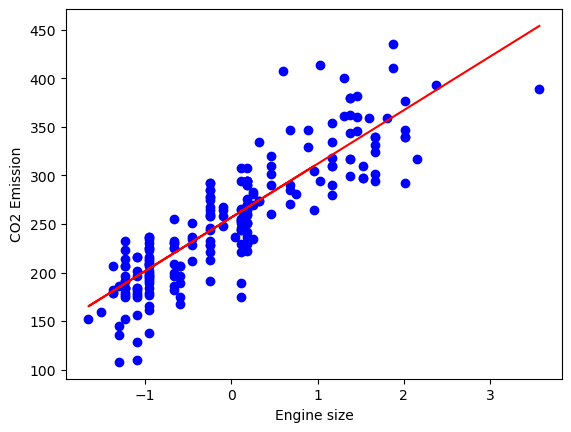

In [32]:
# Checking for the test data now
X_test_1 =X_test[:, 0]
plt.scatter(X_test_1, y_test,  color='blue')
plt.plot(X_test_1, coef_1[0] * X_test_1 + intercept_1, '-r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")

In [39]:
## For FUELCONSUMPTION_COMB_MPG
from sklearn.linear_model import LinearRegression
X_train_2 = X_train[:, 1].reshape(-1, 1)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

print(reg.coef_)
print(reg.intercept_)


[[ 25.27339614 -37.4381472 ]]
[256.29072488]


Text(0, 0.5, 'CO2 Emission')

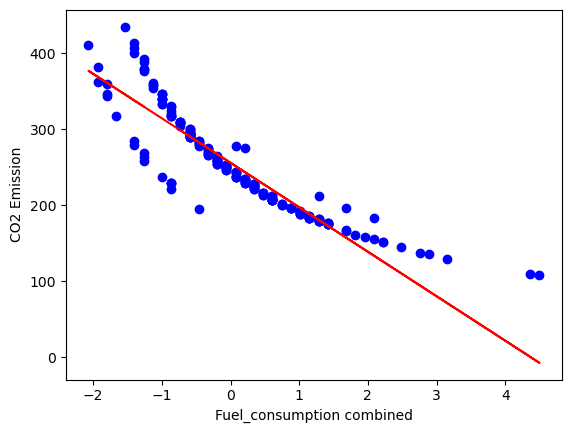

In [34]:
# write your code here
X_test_2 = X_test[:,1]
plt.scatter(X_test_2,y_test, color='blue')

plt.plot(X_test_2, regressor_2.coef_[0] * X_test_2 + regressor_2.intercept_, '-r')
plt.xlabel("Fuel_consumption combined")
plt.ylabel("CO2 Emission")
